In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import espra, unit_det, psi_params, fit_psi_params


In [2]:
width=500
x = np.linspace(-width // 2, width // 2, 101)
y = np.linspace(-width // 2, width // 2, 101)
X, Y = np.meshgrid(x, y, indexing='ij')

xc, yc = 0.0, 0.0
Q11, Q12, Q22 = 1, .4, 1
psi0 = 250.0
Rc = 85.0
A = - psi0 / Rc**2

# rescale Q to have unit determinant
Q, _ = unit_det(Q=np.array([[Q11, Q12], [Q12, Q22]]))
q11, q12, q22 = Q[0,0], Q[0,1], Q[1,1]

df_res = pd.DataFrame({'xc': [xc], 'yc': [yc], 'w': [2*A*(q11+q22)*1e-3], 'q11': [q11], 'q12': [q12], 'q22': [q22],
                        'Rc': [Rc], 'psi0': [psi0], 'A': [A]})

dx, dy = X - xc, Y - yc
rho2 = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
Qr2 = (q11*dx + q12*dy)**2 + (q12*dx + q22*dy)**2 # ||Qr||
psi = psi0 * np.exp( - rho2 / Rc**2 )
u =   psi0 * np.exp( - rho2 / Rc**2 ) * ( 2*q12*dx + 2*q22*dy ) / Rc**2
v = - psi0 * np.exp( - rho2 / Rc**2 ) * ( 2*q11*dx + 2*q12*dy ) / Rc**2

df_res


,xc,yc,w,q11,q12,q22,Rc,psi0,A
0,0.0,0.0,-0.000151,1.091089,0.436436,1.091089,85.0,250.0,-0.034602


(np.float64(-32.2223346002334),
 np.float64(22.22233460023341),
 np.float64(-55.0),
 np.float64(55.0))

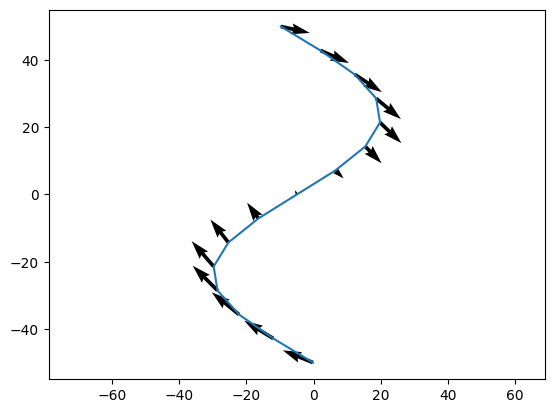

In [3]:
y_squ = np.linspace(-50, 50, 15)
x_squ = 25*np.sin(y_squ/15) - 5

plt.plot(x_squ, y_squ)

from scipy.interpolate import RegularGridInterpolator
interp_u = RegularGridInterpolator((y, x), u.T)
interp_v = RegularGridInterpolator((y, x), v.T)
points = np.vstack([y_squ, x_squ]).T
u_squ = interp_u(points)
v_squ = interp_v(points)

plt.quiver(x_squ, y_squ, u_squ, v_squ)
plt.axis('equal')


(np.float64(-66.32645788363428),
 np.float64(43.4884122944291),
 np.float64(-50.35754064088228),
 np.float64(41.51983475008103))

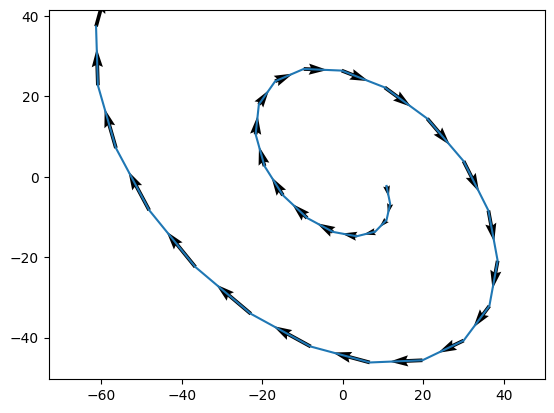

In [4]:
from scipy.interpolate import RegularGridInterpolator

fu = RegularGridInterpolator((x, y), u, bounds_error=False, fill_value=np.nan)
fv = RegularGridInterpolator((x, y), v, bounds_error=False, fill_value=np.nan)

N = 1
x_d = np.array([8.5356055])
y_d = np.array([1.8288253])

dt = 6
steps = 30

xs = [x_d.copy()]
ys = [y_d.copy()]

for _ in range(steps):
    pts = np.column_stack((x_d, y_d))                 
    ud = fu(pts)                                      
    vd = fv(pts)                                      
    oob = np.isnan(ud) | np.isnan(vd)
    if np.any(oob):
        x_d = np.clip(x_d, x.min(), x.max())
        y_d = np.clip(y_d, y.min(), y.max())
        ud = np.nan_to_num(ud, nan=0.0)
        vd = np.nan_to_num(vd, nan=0.0)
    x_d = x_d + ud*dt
    y_d = y_d + vd*dt
    xs.append(x_d.copy())
    ys.append(y_d.copy())
    
x_drif = np.squeeze(np.array(xs)[1:])
y_drif = np.squeeze(np.array(ys)[1:])

points = np.vstack([y_drif, x_drif]).T
u_drif = interp_u(points)
v_drif = interp_v(points)

plt.plot(x_drif, y_drif)
plt.quiver(x_drif, y_drif, u_drif, v_drif)
plt.axis('equal')


(np.float64(-27.5), np.float64(27.5), np.float64(-55.0), np.float64(55.0))

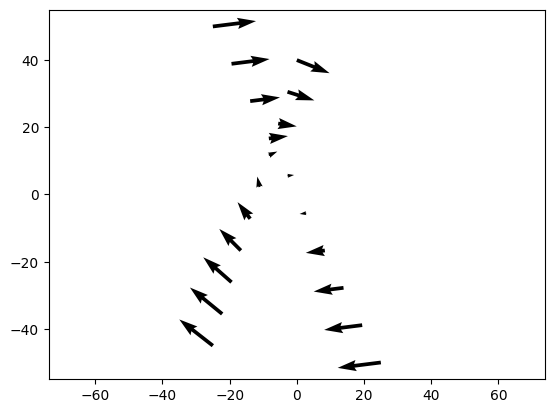

In [5]:
scaling = 5

x_l1 = np.linspace(-5*scaling, 0*scaling, 10)
y_l1 = np.linspace(-9*scaling, 8*scaling, 10)
points = np.vstack([y_l1, x_l1]).T
u_l1 = interp_u(points)
v_l1 = interp_v(points)
plt.quiver(x_l1, y_l1, u_l1, v_l1)

x_l2 = np.linspace(-5*scaling, 5*scaling, 10)
y_l2 = np.linspace(10*scaling, -10*scaling, 10)
points = np.vstack([y_l2, x_l2]).T
u_l2 = interp_u(points)
v_l2 = interp_v(points)
plt.quiver(x_l2, y_l2, u_l2, v_l2)

x_l = np.array(list(x_l1) + list(x_l2))
y_l = np.array(list(y_l1) + list(y_l2))
u_l = np.array(list(u_l1) + list(u_l2))
v_l = np.array(list(v_l1) + list(v_l2))

plt.axis('equal')


(np.float64(-54.0), np.float64(34.0), np.float64(-54.0), np.float64(34.0))

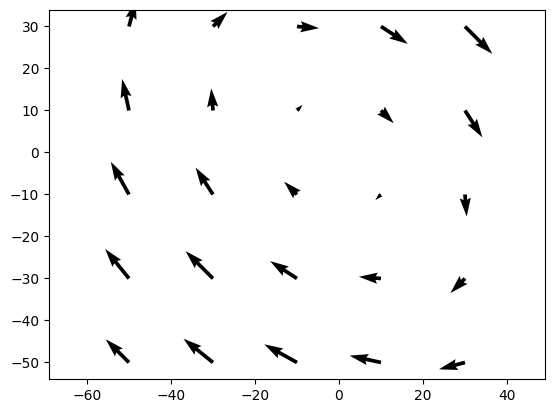

In [6]:
x_p = np.arange(-50, 50, 20)
y_p = np.arange(-50, 50, 20)
x_p, y_p = np.meshgrid(x_p, y_p)
x_p, y_p = x_p.flatten(), y_p.flatten()
points = np.vstack([y_p, x_p]).T
u_p = interp_u(points)
v_p = interp_v(points)
plt.quiver(x_p, y_p, u_p, v_p)
plt.axis('equal')


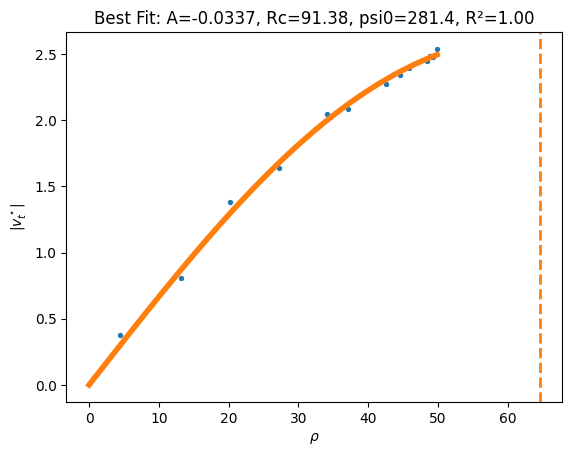

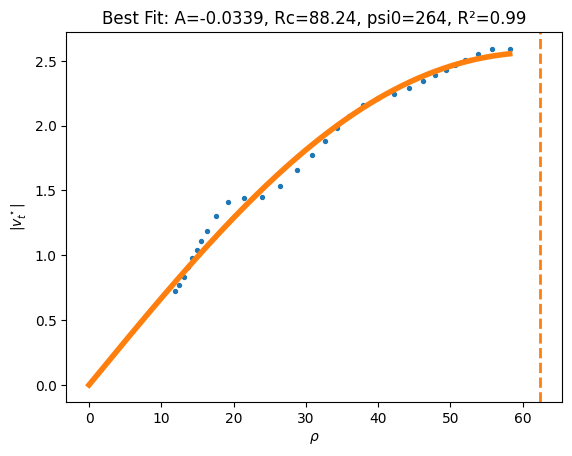

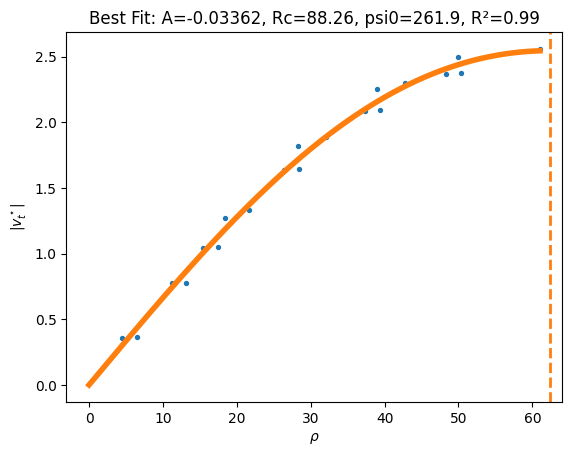

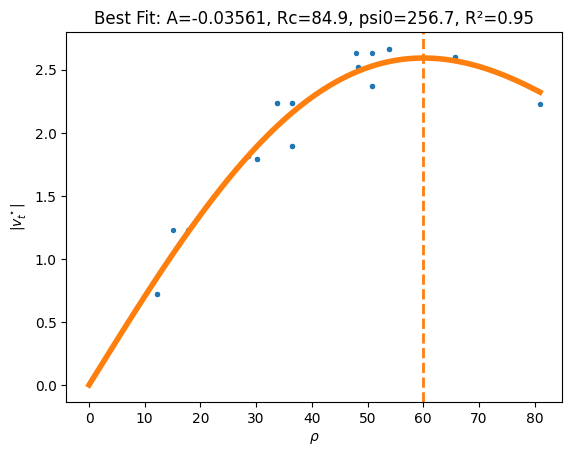

In [7]:
xc, yc, w, Q, Rc, psi0, A = espra(x_squ, y_squ, u_squ, v_squ, plot_flag=True)
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w*1e-3, 'q11': Q[0,0], 'q12': Q[1,0], 'q22': Q[1,1],
                        'Rc': Rc, 'psi0': psi0, 'A': A}
df_squ = psi_params(xc, yc, Q, x_squ, y_squ, u_squ, v_squ)

xc, yc, w, Q, Rc, psi0, A = espra(x_drif, y_drif, u_drif, v_drif, plot_flag=True)
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w*1e-3, 'q11': Q[0,0], 'q12': Q[1,0], 'q22': Q[1,1],
                        'Rc': Rc, 'psi0': psi0, 'A': A}
df_drif = psi_params(xc, yc, Q, x_drif, y_drif, u_drif, v_drif)

xc, yc, w, Q, Rc, psi0, A = espra(x_l, y_l, u_l, v_l, plot_flag=True)
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w*1e-3, 'q11': Q[0,0], 'q12': Q[1,0], 'q22': Q[1,1],
                        'Rc': Rc, 'psi0': psi0, 'A': A}
df_l = psi_params(xc, yc, Q, x_l, y_l, u_l, v_l)

xc, yc, w, Q, Rc, psi0, A = espra(x_p, y_p, u_p, v_p, plot_flag=True)
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w*1e-3, 'q11': Q[0,0], 'q12': Q[1,0], 'q22': Q[1,1],
                        'Rc': Rc, 'psi0': psi0, 'A': A}
df_p = psi_params(xc, yc, Q, x_p, y_p, u_p, v_p)


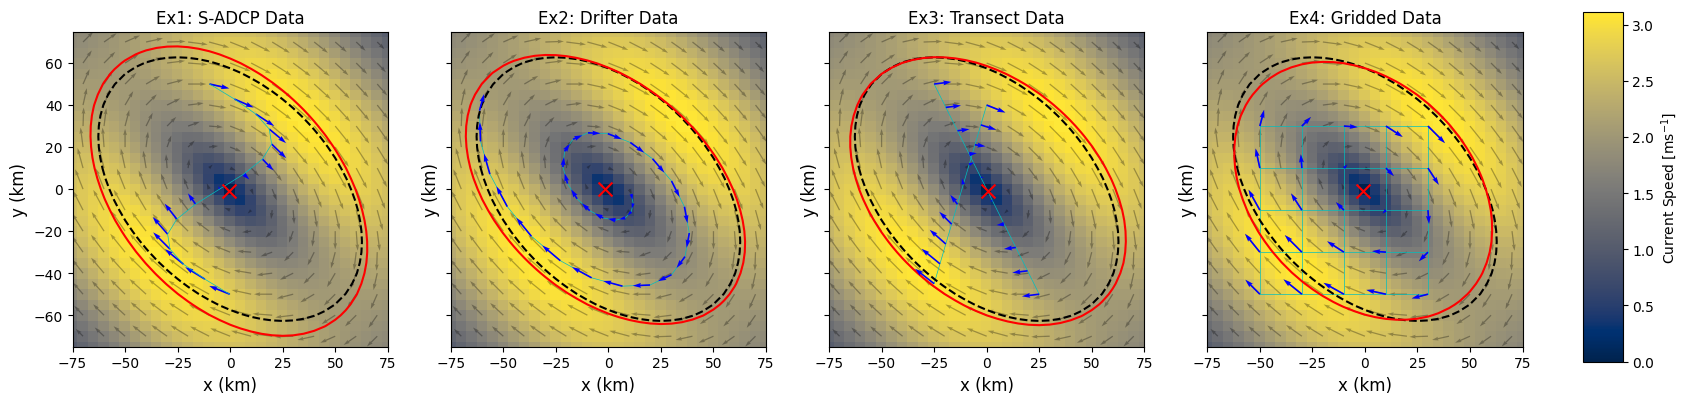

,xc,yc,w,q11,q12,q22,Rc,psi0,A
Control,0.000000,0.000000,-0.000151,1.091089,0.436436,1.091089,85.000000,250.000000,-0.034602
Ex1,-0.610363,-0.920980,-0.000115,1.136969,0.426742,1.039702,91.384376,281.406396,-0.033697
Ex2,-1.422725,-0.172218,-0.000114,1.054104,0.443303,1.135104,88.244382,263.981782,-0.033900
Ex2,0.661206,-0.950574,-0.000112,1.044989,0.393953,1.105466,88.258429,261.905415,-0.033623
Ex3,-0.840778,-0.840778,-0.000099,1.046659,0.309022,1.046659,84.896625,256.683408,-0.035614


In [8]:
clr = 'b'
scat_scale = 1

fig, axs = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=False, sharey=True, sharex=True)

cmap = 'cividis'
spacing, scale, width = 2, 40, 0.004
wid = 1.3

# ---- plot background pcolor + quiver on each axis ----
for ax in axs:
    pc = ax.pcolor(x, y, np.hypot(u, v).T, cmap=cmap)
    ax.quiver(
        x[::spacing], y[::spacing],
        u[::spacing, ::spacing].T, v[::spacing, ::spacing].T,
        alpha=0.3, scale=scale, width=width, zorder=1
    )
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-75, 75)
    ax.set_ylim(-75, 75)
    ax.set_xlabel('x (km)', fontsize=12)
    ax.set_ylabel('y (km)', fontsize=12)

# ---- Panel 1: Example S-ADCP Data ----
axs[0].plot(x_squ, y_squ, 'c', linewidth=.5)
axs[0].quiver(x_squ, y_squ, u_squ, v_squ, scale=scale*scat_scale, width=width*wid, color=clr)
axs[0].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2],
                     colors='k', linestyles='--')
data = df_res.iloc[1]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[0].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[0].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[0].set_title('Ex1: S-ADCP Data')

# ---- Panel 2: Example Drifter Data ----
axs[1].plot(x_drif, y_drif, 'c', linewidth=.5)
axs[1].quiver(x_drif, y_drif, u_drif, v_drif, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[1].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2],
                     colors='k', linestyles='--')
data = df_res.iloc[2]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[1].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[1].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[1].set_title('Ex2: Drifter Data')

# ---- Panel 3: Example Transect Data ----
axs[2].plot(x_l1, y_l1, 'c', linewidth=.5)
axs[2].plot(x_l2, y_l2, 'c', linewidth=.5)
axs[2].quiver(x_l1, y_l1, u_l1, v_l1, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[2].quiver(x_l2, y_l2, u_l2, v_l2, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[2].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2],
                     colors='k', linestyles='--')
data = df_res.iloc[3]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[2].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[2].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[2].set_title('Ex3: Transect Data')

# ---- Panel 4: Example Gridded Data ----
# horizontal transects
for i in range(0, 25, 5):
    axs[3].plot([x_p[i], x_p[i+4]], [y_p[i], y_p[i+4]], 'c', linewidth=.5)
# vertical transects
for i in range(5):
    axs[3].plot([x_p[i], x_p[i+20]], [y_p[i], y_p[i+20]], 'c', linewidth=.5)
axs[3].quiver(x_p, y_p, u_p, v_p, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[3].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2],
                     colors='k', linestyles='--')
data = df_res.iloc[4]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[3].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[3].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[3].set_title('Ex4: Gridded Data')

# ---- now place one colorbar to the right of the entire figure ----
# leave room on the right
fig.subplots_adjust(right=0.85)

# [left, bottom, width, height] in figure coords
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, orientation='vertical', label=r'Current Speed [ms$^{-1}$]')

plt.show()
df_res.index = ['Control', 'Ex1', 'Ex2', 'Ex2', 'Ex3']
df_res


In [14]:
def fit_psi_params(rho2, Qr, vt, A0=None, Rc0=None, plot=False, ax=None,
                   maxfev=10000, Rc_max=1e5, r2_flag=False,
                   rho_plot_max=None, n_curve=400, fit_label='', markersize=50, clr='b', lw=3):
    import numpy as np
    from scipy.optimize import curve_fit
    import matplotlib.pyplot as plt
    import pandas as pd

    import matplotlib.colors as mcolors

    def color_chg(color, factor=.8):
        rgb = mcolors.to_rgb(color)
        return tuple(max(0, c * factor) for c in rgb)

    # def color_chg(color, factor=1.2):
    #     rgb = mcolors.to_rgb(color)
    #     return tuple(min(1, c * factor) for c in rgb)

    d = pd.DataFrame({'rho2': rho2, 'Qr': Qr, 'vt': vt})
    m = (np.isfinite(d.rho2) & np.isfinite(d.vt) & np.isfinite(d.Qr) & (d.rho2 >= 0) & (d.Qr != 0))
    if not np.any(m):
        raise ValueError("No valid rows after masking.")
    rho2 = d.rho2.values[m]
    vt   = d.vt.values[m]
    Qr   = d.Qr.values[m]

    vt = vt * (np.sqrt(rho2) / Qr)

    def vt_model(rho2_, A, Rc):
        return 2.0 * A * np.sqrt(rho2_) * np.exp(-rho2_ / (Rc**2))

    i = np.nanargmax(np.abs(vt))
    rho_max = np.sqrt(rho2[i])
    if Rc0 is None:
        Rc0 = max(rho_max * np.sqrt(2.0), 1e-6)

    denom = 2.0 * np.sqrt(rho2) * np.exp(-rho2 / (Rc0**2))
    ok = np.abs(denom) > 0
    if A0 is None:
        A0 = np.nanmedian(vt[ok] / denom[ok]) if np.any(ok) else 0.0
    if not np.isfinite(A0):
        A0 = 0.0

    popt, _ = curve_fit(vt_model, rho2, vt, p0=[A0, Rc0],
                        bounds=([-np.inf, 1e-8], [np.inf, np.inf]),
                        maxfev=maxfev)
    A_opt, Rc_opt = popt
    if Rc_opt > Rc_max:
        A_opt, Rc_opt = A0, Rc0

    psi0_opt = -A_opt * Rc_opt**2

    vt_fit = vt_model(rho2, *popt)
    ss_res = np.sum((vt - vt_fit)**2)
    ss_tot = np.sum((vt - np.mean(vt))**2)
    r2 = 1 - ss_res / ss_tot if ss_tot != 0 else np.nan

    if plot:
        r_data = np.sqrt(rho2)
        if rho_plot_max is None:
            rho_plot_max = float(np.nanmax(r_data)) if r_data.size else Rc_opt
        r_grid = np.linspace(0.0, rho_plot_max, n_curve)
        vt_grid = vt_model(r_grid**2, A_opt, Rc_opt)


        psi0 = 250.0
        Rc = 85.0
        A = - psi0 / Rc**2
        vt_true = vt_model(r_grid**2, A, Rc)

        if ax is None:
            _, ax = plt.subplots()
        ax.scatter(r_data, np.abs(vt), s=markersize, zorder=1, color=color_chg(clr), marker='x')
        ax.plot(r_grid, np.abs(vt_grid), label=fit_label, lw=lw, zorder=0, color=clr)

        ax.plot(r_grid, np.abs(vt_true), label=fit_label, lw=1, zorder=-1, color='k')
        
        # ax.axvline(x=Rc_opt/np.sqrt(2), ls='--', label=r'$\rho_{\max}$', lw=2)
        ax.set_xlabel(r'$\rho$')
        ax.set_ylabel(r'$|v_t^\star|$')
        # ax.legend()
        ax.set_title(f'Best Fit: A={A_opt:.4g}, Rc={Rc_opt:.4g}, psi0={psi0_opt:.4g}, R²={r2:.2f}')

    return (Rc_opt, psi0_opt, A_opt, r2) if r2_flag else (Rc_opt, psi0_opt, A_opt)
    

Text(0.5, 1.0, '')

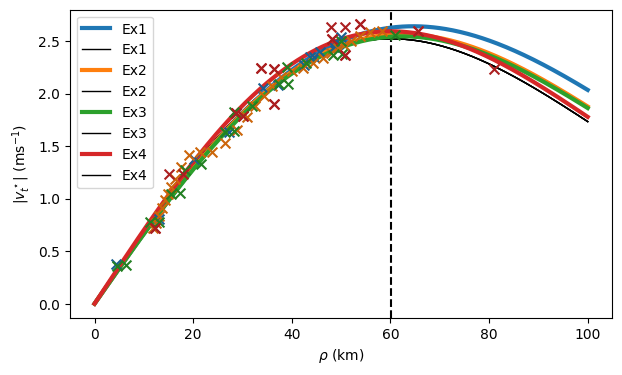

In [15]:
fig, ax = plt.subplots(figsize=(7,4))
rho_plot_max = 100
import matplotlib.colors as mcolors
# --- Get Tab10 colors as RGB tuples ---
tab10 = plt.get_cmap('tab10').colors
fit_psi_params(df_squ.rho2, df_squ.Qr, df_squ.vt, ax=ax, plot=True, rho_plot_max=rho_plot_max, fit_label='Ex1', clr=tab10[0])
fit_psi_params(df_drif.rho2, df_drif.Qr, df_drif.vt, ax=ax, plot=True, rho_plot_max=rho_plot_max, fit_label='Ex2', clr=tab10[1])
fit_psi_params(df_l.rho2, df_l.Qr, df_l.vt, ax=ax, plot=True, rho_plot_max=rho_plot_max, fit_label='Ex3', clr=tab10[2])
fit_psi_params(df_p.rho2, df_p.Qr, df_p.vt, ax=ax, plot=True, rho_plot_max=rho_plot_max, fit_label='Ex4', clr=tab10[3])

ax.axvline(x=Rc/np.sqrt(2), zorder=-1, ls='--', color='k')
ax.set_xlabel(r'$\rho$ (km)', fontsize=10)
ax.set_ylabel(r'$|v_t^\star|$ (ms$^{-1}$)', fontsize=10)

ax.legend(); ax.set_title('')


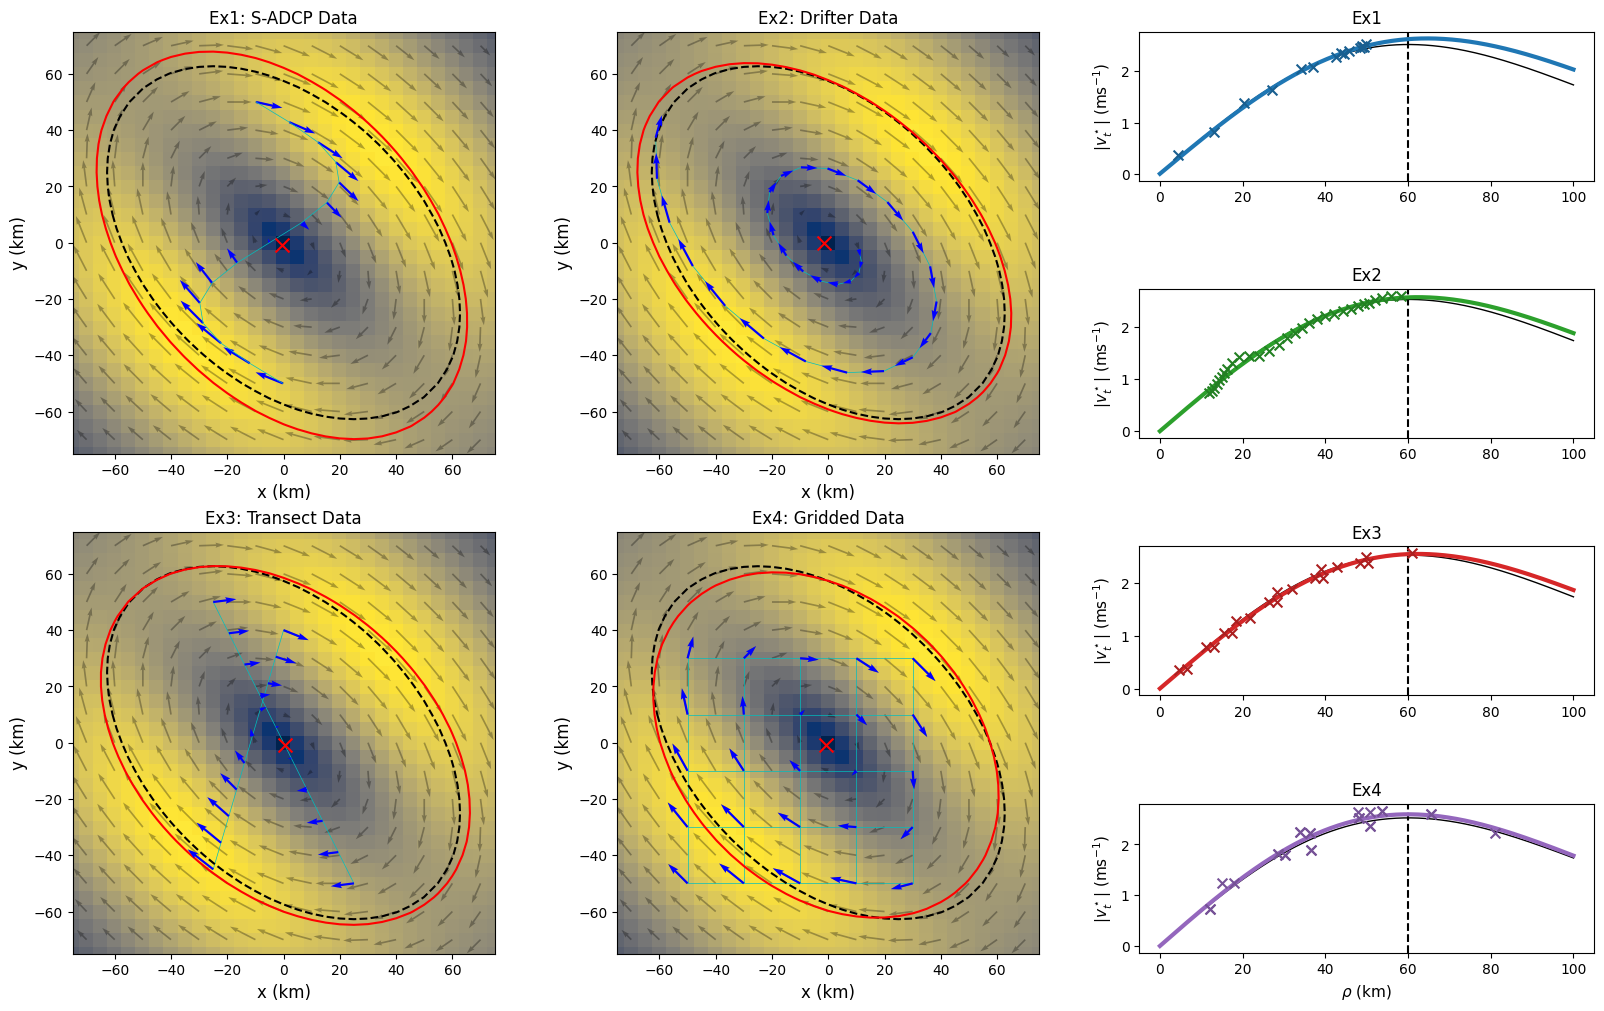

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.colors as mcolors

clr = 'b'
scat_scale = 1
cmap = 'cividis'
spacing, scale, width = 2, 40, 0.004
wid = 1.3

tab10 = plt.get_cmap('tab10').colors

def color_chg(color, factor=.6):
    rgb = mcolors.to_rgb(color)
    return tuple(max(0, c * factor) for c in rgb)

# --- overall layout: 2x3 grid ---
fig = plt.figure(figsize=(16, 10), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 1], wspace=0, hspace=0)

# ---- create 4 example panels ----
axs = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1])]

# ---- background field ----
for ax in axs:
    pc = ax.pcolor(x, y, np.hypot(u, v).T, cmap=cmap)
    ax.quiver(x[::spacing], y[::spacing],
              u[::spacing, ::spacing].T, v[::spacing, ::spacing].T,
              alpha=0.3, scale=scale, width=width, zorder=1)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-75, 75)
    ax.set_ylim(-75, 75)
    ax.set_xlabel('x (km)', fontsize=12)
    ax.set_ylabel('y (km)', fontsize=12)

# ---- Panel 1: Example S-ADCP Data ----
axs[0].plot(x_squ, y_squ, 'c', linewidth=.5)
axs[0].quiver(x_squ, y_squ, u_squ, v_squ, scale=scale*scat_scale, width=width*wid, color=clr)
axs[0].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2], colors='k', linestyles='--')
data = df_res.iloc[1]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[0].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[0].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[0].set_title('Ex1: S-ADCP Data')

# ---- Panel 2: Example Drifter Data ----
axs[1].plot(x_drif, y_drif, 'c', linewidth=.5)
axs[1].quiver(x_drif, y_drif, u_drif, v_drif, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[1].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2], colors='k', linestyles='--')
data = df_res.iloc[2]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[1].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[1].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[1].set_title('Ex2: Drifter Data')

# ---- Panel 3: Example Transect Data ----
axs[2].plot(x_l1, y_l1, 'c', linewidth=.5)
axs[2].plot(x_l2, y_l2, 'c', linewidth=.5)
axs[2].quiver(x_l1, y_l1, u_l1, v_l1, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[2].quiver(x_l2, y_l2, u_l2, v_l2, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[2].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2], colors='k', linestyles='--')
data = df_res.iloc[3]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[2].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[2].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[2].set_title('Ex3: Transect Data')

# ---- Panel 4: Example Gridded Data ----
for i in range(0, 25, 5):
    axs[3].plot([x_p[i], x_p[i+4]], [y_p[i], y_p[i+4]], 'c', linewidth=.5)
for i in range(5):
    axs[3].plot([x_p[i], x_p[i+20]], [y_p[i], y_p[i+20]], 'c', linewidth=.5)
axs[3].quiver(x_p, y_p, u_p, v_p, scale=scale*scat_scale, width=width*wid, color=clr, zorder=3)
axs[3].contour(X, Y, rho2, levels=[df_res.iloc[0].Rc**2/2], colors='k', linestyles='--')
data = df_res.iloc[4]
dx_ell, dy_ell = X - data.xc, Y - data.yc
rho2_ell = data.q11*dx_ell**2 + 2*data.q12*dx_ell*dy_ell + data.q22*dy_ell**2
axs[3].contour(X, Y, rho2_ell, levels=[data.Rc**2/2], colors='r')
axs[3].scatter(data.xc, data.yc, marker='x', s=100, color='r', zorder=10)
axs[3].set_title('Ex4: Gridded Data')

# ---- right-side: 4x1 stacked fits ----
right = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs[:, 2], hspace=0.25)
ax_fits = [fig.add_subplot(right[i, 0]) for i in range(4)]

rho_plot_max = 100
lw = 3
Rc = df_res.iloc[0].Rc

fit_psi_params(df_squ.rho2, df_squ.Qr, df_squ.vt, ax=ax_fits[0], plot=True, rho_plot_max=rho_plot_max, fit_label='Ex1', clr=tab10[0], lw=lw)
ax_fits[0].axvline(x=Rc/np.sqrt(2), ls='--', color='k', zorder=-1)
ax_fits[0].set_title('Ex1')
ax_fits[0].set_xlabel('')
ax_fits[0].set_ylabel(r'$|v_t^\star|$ (ms$^{-1}$)', fontsize=11)

fit_psi_params(df_drif.rho2, df_drif.Qr, df_drif.vt, ax=ax_fits[1], plot=True, rho_plot_max=rho_plot_max, fit_label='Ex2', clr=tab10[2], lw=lw)
ax_fits[1].axvline(x=Rc/np.sqrt(2), ls='--', color='k', zorder=-1)
ax_fits[1].set_title('Ex2')
ax_fits[1].set_xlabel('')
ax_fits[1].set_ylabel(r'$|v_t^\star|$ (ms$^{-1}$)', fontsize=11)

fit_psi_params(df_l.rho2, df_l.Qr, df_l.vt, ax=ax_fits[2], plot=True, rho_plot_max=rho_plot_max, fit_label='Ex3', clr=tab10[3], lw=lw)
ax_fits[2].axvline(x=Rc/np.sqrt(2), ls='--', color='k', zorder=-1)
ax_fits[2].set_title('Ex3')
ax_fits[2].set_xlabel('')
ax_fits[2].set_ylabel(r'$|v_t^\star|$ (ms$^{-1}$)', fontsize=11)

fit_psi_params(df_p.rho2, df_p.Qr, df_p.vt, ax=ax_fits[3], plot=True, rho_plot_max=rho_plot_max, fit_label='Ex4', clr=tab10[4], lw=lw)
ax_fits[3].axvline(x=Rc/np.sqrt(2), ls='--', color='k', zorder=-1)
ax_fits[3].set_title('Ex4')
ax_fits[3].set_xlabel(r'$\rho$ (km)', fontsize=11)
ax_fits[3].set_ylabel(r'$|v_t^\star|$ (ms$^{-1}$)', fontsize=11)

plt.show()
